# MNIST

### MNIST 데이터 받기

In [1]:
import os
import sys
from six.moves import urllib
import gzip
import cPickle
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


SOURCE_URL = 'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
FILENAME = SOURCE_URL.split('/')[-1]
DATA_DIR = '../datasets'

def maybe_download(data_dir):
    filepath = os.path.join(data_dir, FILENAME)
    if not os.path.exists(data_dir):
        os.makedirs(data_dir)
    if not os.path.isfile(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\r>> Downloading {} {:.1f} %'.format(
                FILENAME, float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.request.urlretrieve(SOURCE_URL, filepath, _progress)
        print()
        statinfo = os.stat(filepath)
        print('Successfully donloaded', FILENAME, statinfo.st_size, 'bytes.')

def load(data_dir, subset='train'):
    maybe_download(data_dir)
    filepath = os.path.join(data_dir, FILENAME)
    
    f = gzip.open(filepath, 'rb')
    train_set, valid_set, test_set = cPickle.load(f)
    f.close()
    
    if subset == 'train':
        trainx, trainy = train_set
        trainx = trainx.astype(np.float32).reshape(trainx.shape[0], 28, 28)
        trainy = trainy.astype(np.uint8)
        return trainx, trainy
    elif subset == 'test':
        testx, testy = test_set
        testx = testx.astype(np.float32).reshape(testx.shape[0], 28, 28)
        testy = testy.astype(np.uint8)
        return testx, testy
    elif subset== 'valid':
        validx, validy = valid_set
        validx = validx.astype(np.float32).reshape(validx.shape[0], 28, 28)
        validy = validy.astype(np.uint8)
        return validx, validy
    else:
        raise NotImplementedError('subset should be train or valid or test')

# Load data
train_data, train_label = load(DATA_DIR, 'train')
valid_data, valid_label = load(DATA_DIR, 'valid')
test_data, test_label = load(DATA_DIR, 'test')

# concatenate train and valid data as train data
train_data = np.concatenate((train_data, valid_data))
train_label = np.concatenate((train_label, valid_label))

>> Downloading mnist.pkl.gz 100.0 %()
('Successfully donloaded', 'mnist.pkl.gz', 16168813, 'bytes.')


### MNIST 데이터 확인하기

In [2]:
# size of MNIST
print train_data.shape
print train_label.shape
print test_data.shape
print test_label.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


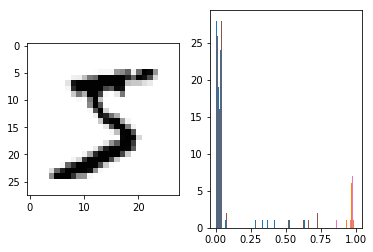

In [3]:
# show data
_, (ax1, ax2) = plt.subplots(1, 2)
sample_data = train_data[0]
ax1.imshow(sample_data, cmap=plt.cm.Greys);
ax2.hist(sample_data, bins=20, range=[0, 1]);

AxesImage(54,36;334.8x217.44)


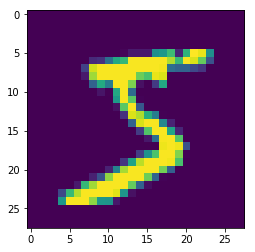

In [7]:
print(plt.imshow(sample_data))

### Data Pre-processing (데이터 전처리)

In [ ]:
import tensorflow as tf
import random
import shutil

SUMMARY_DIR = './summary'
TRAIN_DIR = SUMMARY_DIR + '/train'
TEST_DIR = SUMMARY_DIR + '/test'

if os.path.exists(SUMMARY_DIR):
    shutil.rmtree(SUMMARY_DIR)
if not os.path.exists(SUMMARY_DIR):
    os.makedirs(SUMMARY_DIR)
    os.makedirs(TRAIN_DIR)
    os.makedirs(TEST_DIR)

def get_next_batch(data, label, batch_size):
    """
    get 'batch_size' amount of data and label randomly

    Args:
        data: data
        label: label
        batch_size: # of data to get

    Returns:
        batch_data: data of 'batch_size'
        batch_label: coresponding label of batch_data
    """
    n_data = data.shape[0]
    random_idx = random.sample(range(1, n_data), batch_size)
    
    batch_data = data[random_idx]
    batch_label = label[random_idx]
    return batch_data, batch_label

def get_one_hot(label):
    """
    get one hot encoded label matrix

    Args:
        label: original label

    Returns:
        One hot encoded label matrix
    """
    # Make 0 initialized numpy array with shape of [label.shape[0], 10]
    one_hot = np.zeros((label.shape[0], 10))
    # Fill up the array according to the input label
    one_hot[np.arange(label.shape[0]), label.astype(int)] = 1
    return one_hot

# Implementation (1)


## Loss function (손실 함수) : Cross Entropy

# <center> \\( L(y_i, f(x_i; W)) = -\frac{1}{n}\sum_{i=1}^{n}\sum_{k=1} y_{i,j} log(f(x_i)_k)\\)</center>

In [ ]:
def get_cross_entropy_loss(y_true, y_hat, epsilon=1e-8):
    """
    compute cross entropy

    Args:
        y_true: true label
        y_hat: predicted label
        epsilon: small value to prevent NaN in log

    Returns:
        cross entropy loss
    Hints
        - tf.reduce_mean  
        - tf.reduce_sum
        - tf.log
    """
    with tf.name_scope('cross_entropy'):
        cross_entropy = 
    return cross_entropy

def get_accuracy(y_true, y_hat):
    """
    accuracy 구하기

    Args:
        y_true: true label
        y_hat: predicted label
    Returns:
        Accuracy
    Hints
        - tf.equal : 값을 비교하여 동일하면 1, 다르면 0을 return
        - tf.argmax : 값이 최대인 위치의 index를 return
        - tf.cast : data type을 변경하는 함수
        - tf.reduce_mean : 지정한 축(axis)에 대해 평균을 취하는 함수.
    """
    with tf.name_scope('accuracy'):
        # Compare the highest indices between the predicted label and the true label
        correct_prediction = 
        # Compute accuracy
        accuracy = 
    return accuracy

## Hyper-parameter (하이퍼 파라미터)

In [ ]:
# Set hypyerparameters
learning_rate = 0.01
iteration = 2000
step_size = iteration/10
batch_size = 100

# Implementation (2)
## Linear Classifier (선형 분류기)

## <center> \\( f(x) = xW+b \\)</center>


In [ ]:
def linear(inputs, out_dim, name):
    """
    Args :
        Inputs : Input tensor
        out_dim : output dimension
        name : name for parameter
    Returns:
        output
    Hints
        - tf.Variable  
        - tf.matmul
    """
    with tf.name_scope('linear_classifier'):
        # Get dimension of inputs (not batch)
        in_dim = 
        # initializer for weight matrix -> tf.zeros([])
        W = 
        # initializer for bias vector -> tf.zeros([])
        b = 
        # compute logits
        y_logits =
    return y_logits

# 1. With Softmax Linear Classifier
## <center> \\( f(x_i; W,b) =  \sigma(xW+b) \\)</center>

> where $\sigma$ is softmax function, i.e.,

## <center> \\( \sigma(x)_i =  \frac{e^{x_i}}{\sum_j e^{x_j}}  \\)</center>

In [ ]:
def model_1(x):
    """
        Softmax Linear Classifier Model
        
        Args:
            x : input
            k : the number of classes, i.e., output dimension of the model
        Returns:
            output
            weights list
            bias list
        Hints:
            tf.nn.softmax : softmax function
    """
    out = 
    out = 
    return out

In [ ]:
tf.reset_default_graph()
train_label_hot = get_one_hot(train_label)
test_label_hot = get_one_hot(test_label)
# ---------------------------------------------------------------------------------------------------------
# 0) Data_flatten
# 3차원 Tensor를 2차원 maxtrix로 reshape
# Hint : np.reshape()
# ---------------------------------------------------------------------------------------------------------
train_data =
test_data = 

# ---------------------------------------------------------------------------------------------------------
# 1) Declare Placeholders
# input, true_label을 위한 placeholder 선언
# Hint : tf.placeholder, input과 ouput이 어떤 차원을 가져야할지 고민해봅시다.
# ---------------------------------------------------------------------------------------------------------
x = 
y_true =

# ---------------------------------------------------------------------------------------------------------
# 2) model declare
# Prediction을 위해 기존의 정의한 model을 사용합니다.
# ---------------------------------------------------------------------------------------------------------
y_pred = 

# ---------------------------------------------------------------------------------------------------------
# 3) obtain loss & accuracy
# 앞서 정의한 function들을 통해 loss와 accuracy를 얻습니다.
# ---------------------------------------------------------------------------------------------------------
cross_entropy = 
accuracy = 


# ---------------------------------------------------------------------------------------------------------
# 4) Optimizer
# Parameter Update를 위한 Optimizer를 선언합니다. Learning rate는 learning_rate로 선언된 변수를 사용합니다.
# Hint : tf.train.GradientDescentOptimizer
# ---------------------------------------------------------------------------------------------------------
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

# ---------------------------------------------------------------------------------------------------------
# 7) Session 
# tensorflow의 연산을 수행하기 위해 session을 호출합니다.
# 8) variable iniializer 
# tensorflow의 variable들을 초기화 하기 위해 initializer를 사용합니다.
# Hint : tf.global_variables_initializer
# 9) training 
# 학습에서 사용할 iteration 수는 위의 iteration을 사용합니다. Loss 및 accuracy를 check할 때 step_size를 사용합니다.
# ---------------------------------------------------------------------------------------------------------
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
  
    # Training
    for step in range(max_iter):
        # Get batch data and label
        batch_x, batch_y = get_next_batch(train_data, train_label_hot, batch_size)
        # train the network and calculate cross entropy
        _, loss = sess.run([train_step, cross_entropy], feed_dict={x: batch_x, y_true: batch_y})
        # calcualte accuracy
        acc = sess.run(accuracy, feed_dict={x: test_data, y_true: test_label_hot})
        # print loss (cross entropy) and accuracy at every 10th step
        if (step + 1) % step_size == 0:
            print("{}th iteration, loss: {:.4f}, test accuracy: {:.4f}".format(step + 1, loss, acc))

# Implementation (4)

## Non-Linear Classifier & Multi-Layer Perceptron

## <center> \\( f(x) = W^T_2\sigma(W^T_1x+b_1)+b_2 \\)</center>

### 위에서 완성한 linear function과 relu activation function을 활용하여, 1개의 hidden layer가 있는 MLP를 구현하세요.

In [ ]:
def model_2(Inputs, hidden, out_dim):
    """
        Neural Network with 1 Hidden layer.
        Args:
            x : input
            k : the number of classes, i.e., output dimension of the model
        Returns:
            output
            weights list
            bias list
        Hint:
            tf.nn.relu : activation function
            tf.nn.softmax : softmax function
    """
    # First fully connected layer
    h = 
    # add non-linearity (using tf.nn.relu(input))
    h_relu =
    # Second fully connected layer
    y_logits = 
    out =
    return out

# Implementation (5)

## Model Setting

### 1. Training data 및 Test data의 각각의 image를 한 vector로 만들어서 train_data, test_data에 각각 저장하세요.
#### Hint) 데이터 차원.
### 2. Dataset로부터 받은 데이터(Image, label)를 담을 변수를 각각 x 및 y_true에 선언하고, DropOut을 위한 확률 값을 담을 변수를 keep_prob에 저장하세요.
#### Hint) tf.placeholder
### 3. Implementation (4)에서 구현한  Multilayer perceptron 함수와 softmax 함수를 통한 prediction 값을 y_hat에 저장하세요.
#### Hint) tf.nn.softmax
### 4. 3으로부터 얻은 결과를 통해 Implementation (1)에서 구현한 loss function을 통해 얻은 loss를 cross_entropy에 저장하세요.

In [ ]:
tf.reset_default_graph()
train_label_hot = get_one_hot(train_label)
test_label_hot = get_one_hot(test_label)
# ---------------------------------------------------------------------------------------------------------
# 0) Data_flatten
# 3차원 Tensor를 2차원 maxtrix로 reshape
# Hint : np.reshape()
# ---------------------------------------------------------------------------------------------------------
train_data = 
test_data = 

# ---------------------------------------------------------------------------------------------------------
# 1) Declare Placeholders
# input, true_label을 위한 placeholder 선언
# Hint : tf.placeholder, input과 ouput이 어떤 차원을 가져야할지 고민해봅시다.
# ---------------------------------------------------------------------------------------------------------
x = 
y_true = 

# ---------------------------------------------------------------------------------------------------------
# 2) model declare
# Prediction을 위해 기존의 정의한 model을 사용합니다.
# ---------------------------------------------------------------------------------------------------------
y_pred =

# ---------------------------------------------------------------------------------------------------------
# 3) obtain loss & accuracy
# 앞서 정의한 function들을 통해 loss와 accuracy를 얻습니다.
# ---------------------------------------------------------------------------------------------------------
cross_entropy = 
accuracy = 


# ---------------------------------------------------------------------------------------------------------
# 4) Optimizer
# Parameter Update를 위한 Optimizer를 선언합니다. Learning rate는 learning_rate로 선언된 변수를 사용합니다.
# Hint : tf.train.GradientDescentOptimizer
# ---------------------------------------------------------------------------------------------------------
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

# ---------------------------------------------------------------------------------------------------------
# 7) Session 
# tensorflow의 연산을 수행하기 위해 session을 호출합니다.
# 8) variable iniializer 
# tensorflow의 variable들을 초기화 하기 위해 initializer를 사용합니다.
# Hint : tf.global_variables_initializer
# 9) training 
# 학습에서 사용할 iteration 수는 위의 iteration을 사용합니다. Loss 및 accuracy를 check할 때 step_size를 사용합니다.
# ---------------------------------------------------------------------------------------------------------
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
  
    # Training
    for step in range(max_iter):
        # Get batch data and label
        batch_x, batch_y = get_next_batch(train_data, train_label_hot, batch_size)
        # train the network and calculate cross entropy
        _, loss = sess.run([train_step, cross_entropy], feed_dict={x: batch_x, y_true: batch_y})
        # calcualte accuracy
        acc = sess.run(accuracy, feed_dict={x: test_data, y_true: test_label_hot})
        # print loss (cross entropy) and accuracy at every 10th step
        if (step + 1) % step_size == 0:
            print("{}th iteration, loss: {:.4f}, test accuracy: {:.4f}".format(step + 1, loss, acc))